In [2]:
from glob import glob
import pandas as pd
import datetime

In [26]:
dfs = []

for p in sorted(glob("../data/*")):
    try:
        df = pd.read_csv(p)
        df["time"] = datetime.datetime.fromtimestamp(int(p.split("/")[-1][:-4]))
        dfs.append(df)
    except Exception as e:
        print(type(e), p, datetime.datetime.fromtimestamp(int(p.split("/")[-1][:-4])))

df = pd.concat(dfs)

<class 'pandas.errors.EmptyDataError'> ../data/1654519389.csv 2022-06-06 12:43:09
<class 'pandas.errors.EmptyDataError'> ../data/1656487244.csv 2022-06-29 07:20:44
<class 'pandas.errors.EmptyDataError'> ../data/1656517953.csv 2022-06-29 15:52:33


In [27]:
dfs[-1]

name  type          provider  \
0                      Holstenstraße / Thadenstraße  area  stadtrad-hamburg   
1                  Bruno-Tesch-Platz / Jessenstraße  area  stadtrad-hamburg   
2                  Holstenstraße / Max-Brauer-Allee  area  stadtrad-hamburg   
3                 Chemnitzstraße / Max-Brauer-Allee  area  stadtrad-hamburg   
4                        S Reeperbahn / Königstraße  area  stadtrad-hamburg   
..                                              ...   ...               ...   
282                Eidelstedt-Center / Elbgaustraße  area  stadtrad-hamburg   
283            AKN+S Eidelstedt / Reichsbahnstrtaße  area  stadtrad-hamburg   
284  AKN Eidelstedt Zentrum / Johann-Schmidt-Straße  area  stadtrad-hamburg   
285                       S Elbgaustraße / Weidplan  area  stadtrad-hamburg   
286               Volksparkstadion / Sylvesterallee  area  stadtrad-hamburg   

    rentalObjectTypes  position.lat  position.lng  rentalObjectCount.bike  \
0            ['bike']     53.555827      9.950708                       5   
1            ['bike']     53.551200      9.945760                       4   
2            ['bike']     53.558650      9.948730                       1   
3            ['bike']     53.555300      9.942860                       3   
4            ['bike']     53.549501      9.954934                       8   
..                ...           ...           ...                     ...   
282          ['bike']     53.606550      9.903900                      14   
283          ['bike']     53.596660      9.906080                       2   
284          ['bike']     53.609500      9.900510                       6   
285          ['bike']     53.602870      9.893460                       6   
286          ['bike']     53.587460      9.903890                       0   

     rentalObjectCount.cargopedelec                time  
0                                 0 2022-06-29 17:24:16  
1                                 0 2022-06-29 17:24:16  
2                                 0 2022-06-29 17:24:16  
3                                 0 2022-06-29 17:24:16  
4                                 0 2022-06-29 17:24:16  
..                              ...                 ...  
282                               0 2022-06-29 17:24:16  
283                               0 2022-06-29 17:24:16  
284                               0 2022-06-29 17:24:16  
285                               0 2022-06-29 17:24:16  
286                               0 2022-06-29 17:24:16  

[287 rows x 9 columns]

In [4]:
df.columns

Index(['name', 'type', 'provider', 'rentalObjectTypes', 'position.lat',
       'position.lng', 'rentalObjectCount.bike',
       'rentalObjectCount.cargopedelec', 'time'],
      dtype='object')

In [18]:
df.name.unique()

array(['Eimsbütteler Straße / Waterloostraße',
       'Schulterblatt / Eifflerstraße', 'Sandweg / Sophienallee',
       'U Christuskirche / Fruchtallee', 'U Emilienstraße / Fruchtallee',
       'S Holstenstraße / Düppelstraße', 'Osterstraße / Bismarckstraße',
       'S+U Sternschanze / Dänenweg', 'U Schlump / Gustav-Falke-Straße',
       'Holstenstraße / Max-Brauer-Allee',
       'Neuer Pferdemarkt / Beim Grünen Jäger', 'U Osterstraße / Heußweg',
       'Mariannenruhplatz / Eva-Rühmkorf-Straße',
       'Holstenstraße / Thadenstraße',
       'Lappenbergsallee / Bei der Apostelkirche',
       'Heußweg / Wiesenstraße', 'Goebenstraße / Eppendorfer Weg',
       'U Feldstraße / Marktstraße', 'Paulinenplatz / Wohlwillstraße',
       'Felicitas-Kukuck-Straße / Lille Torv',
       'Chemnitzstraße / Max-Brauer-Allee', 'Bogenstraße / Grindelallee',
       'U Messehallen / Marktstraße', 'Methfesselstraße / Luruper Weg',
       'Allende-Platz / Grindelhof',
       'Grindelberg / Bezirksamt Eimsbütt

In [5]:
# df.groupby("name").size().sort_values()[-49:]

In [23]:
df.time.sort_values()

47    2022-05-30 20:12:01
25    2022-05-30 20:12:01
26    2022-05-30 20:12:01
27    2022-05-30 20:12:01
28    2022-05-30 20:12:01
              ...        
162   2022-06-29 17:24:16
163   2022-06-29 17:24:16
164   2022-06-29 17:24:16
155   2022-06-29 17:24:16
189   2022-06-29 17:24:16
Name: time, Length: 31934, dtype: datetime64[ns]

In [21]:
df[df.name=="Am Strandkai / Großer Grasbrook"]

name  type          provider  \
139  Am Strandkai / Großer Grasbrook  area  stadtrad-hamburg   
139  Am Strandkai / Großer Grasbrook  area  stadtrad-hamburg   

    rentalObjectTypes  position.lat  position.lng  rentalObjectCount.bike  \
139          ['bike']      53.53958       9.99365                       0   
139          ['bike']      53.53958       9.99365                       1   

     rentalObjectCount.cargopedelec                time        date  
139                               0 2022-06-29 17:24:16  2022-06-29  
139                               0 2022-06-29 16:31:22  2022-06-29

<AxesSubplot:xlabel='time'>

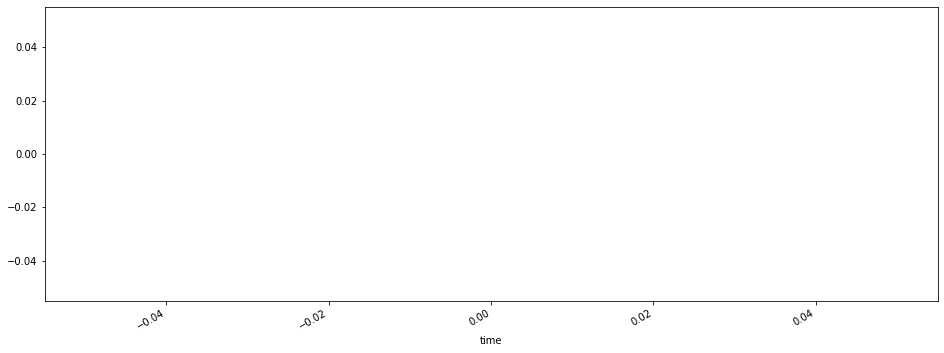

In [19]:
df[df.name=="Am Strandkai / Großer Grasbrook"].set_index("time")["rentalObjectCount.bike"]["2022-06-11"].plot(figsize=(16,6))

In [7]:
df["date"] = df.time.dt.date

In [8]:
df2 = pd.merge(
    left = df,
    right = df.groupby([df.date, df.name])["rentalObjectCount.bike"].max().reset_index(),
).groupby(["date", "name"])["time"].min()

In [9]:
import matplotlib.pylab as plt

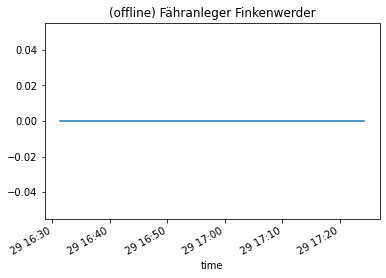

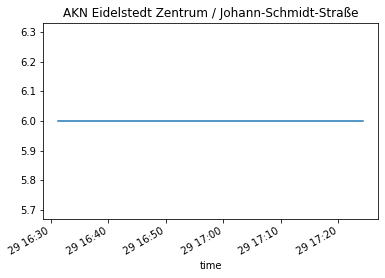

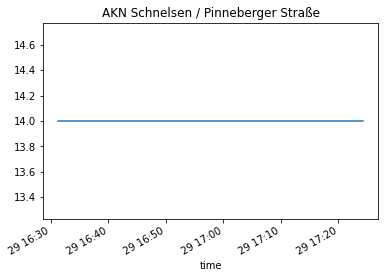

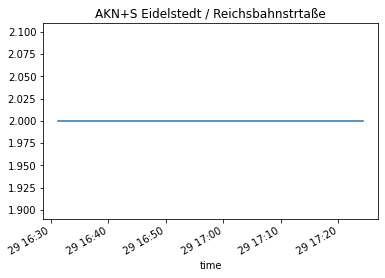

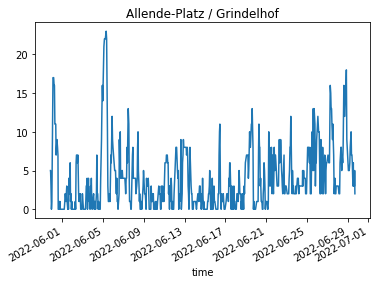

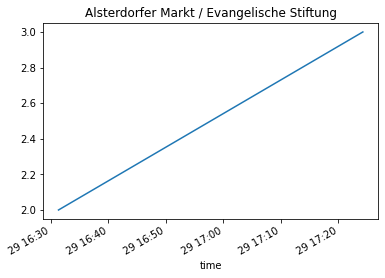

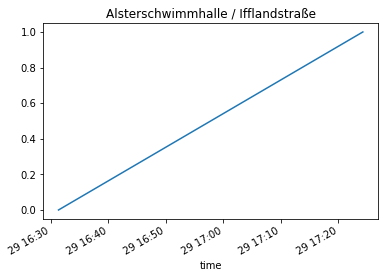

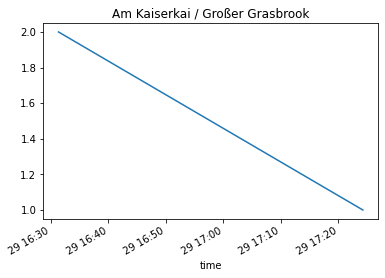

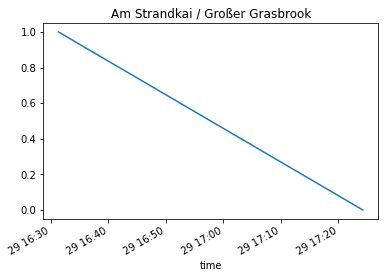

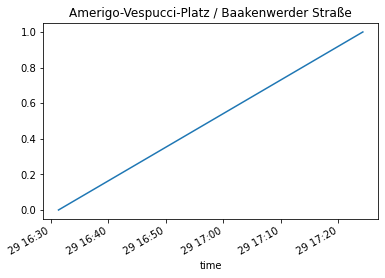

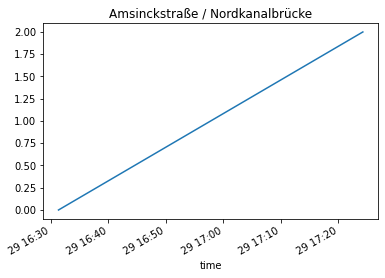

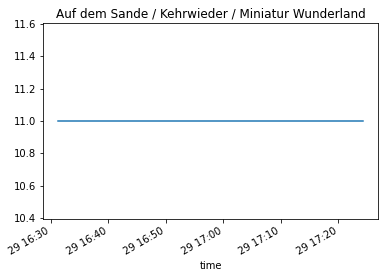

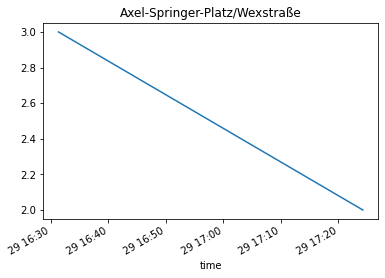

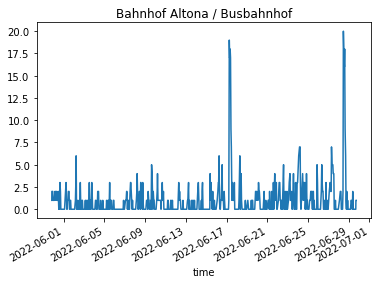

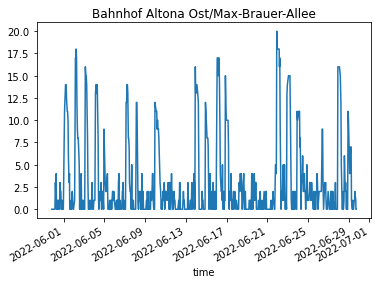

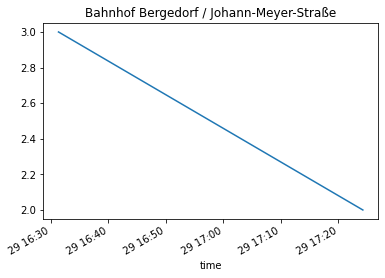

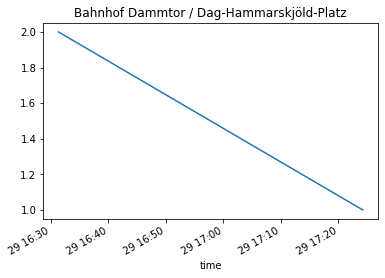

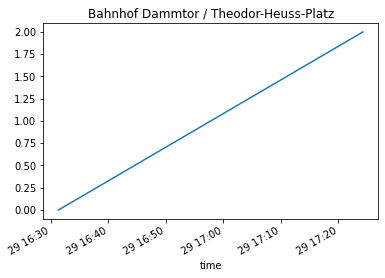

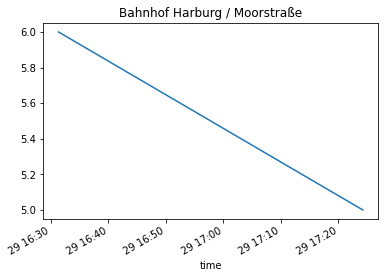

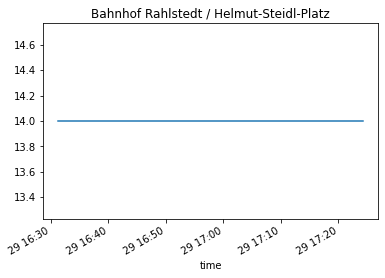

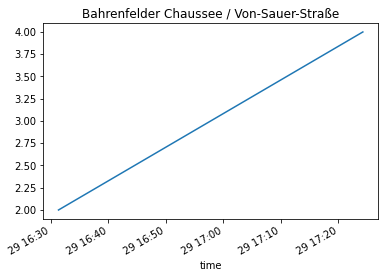

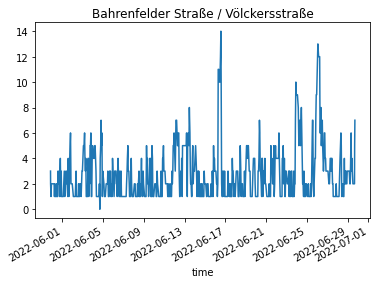

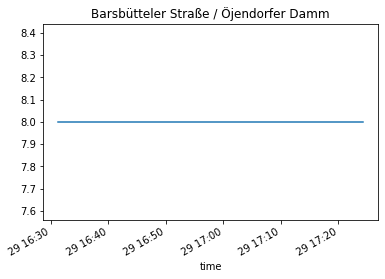

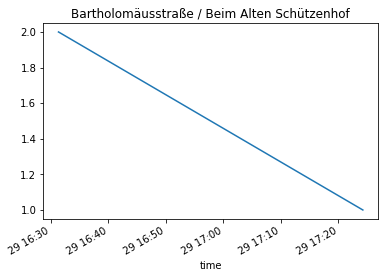

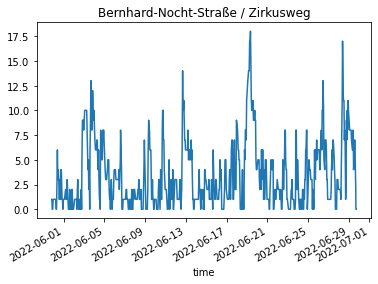

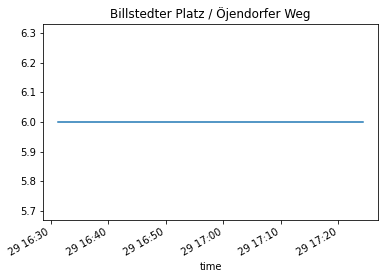

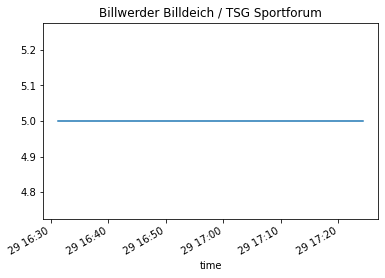

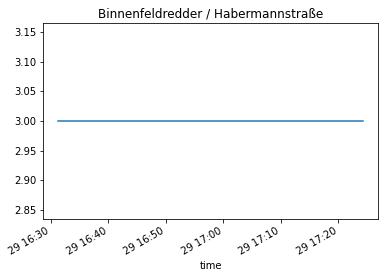

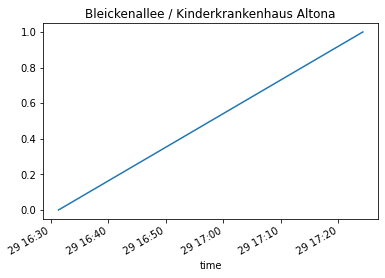

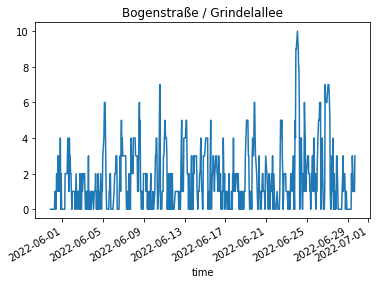

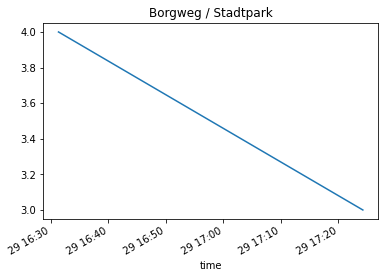

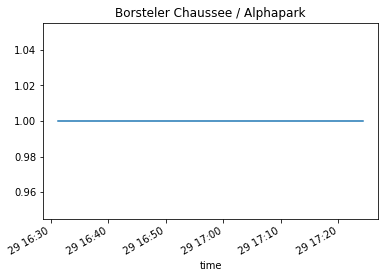

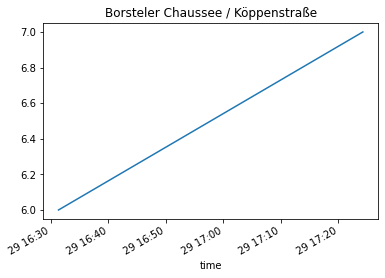

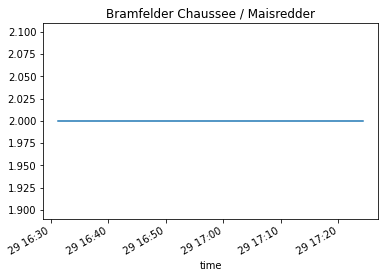

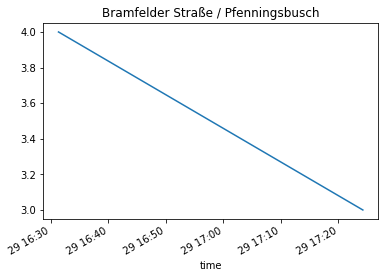

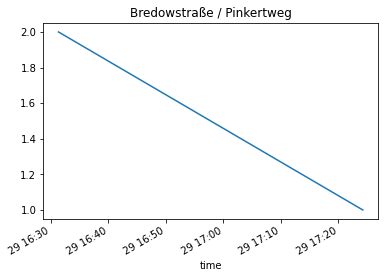

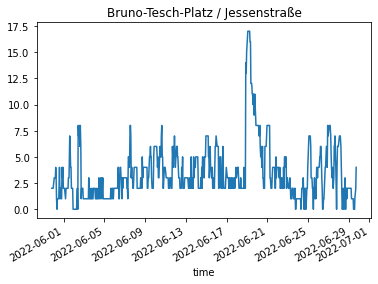

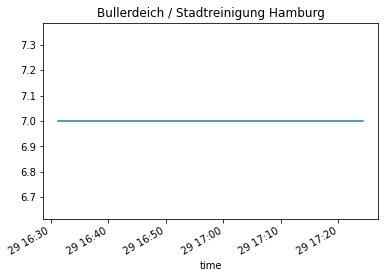

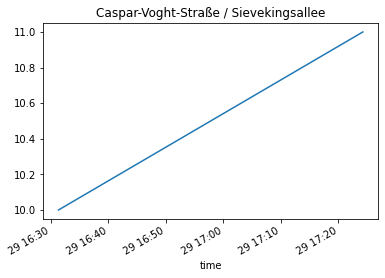

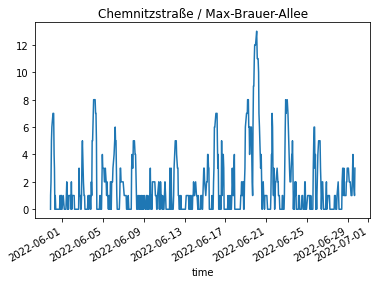

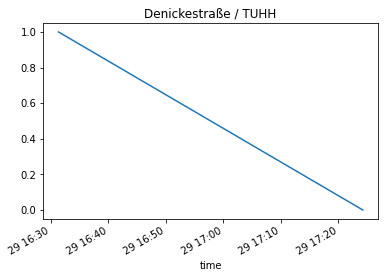

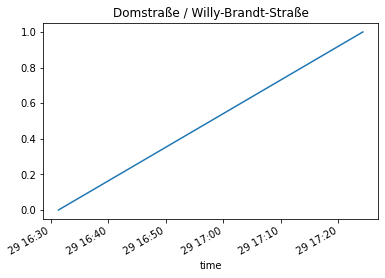

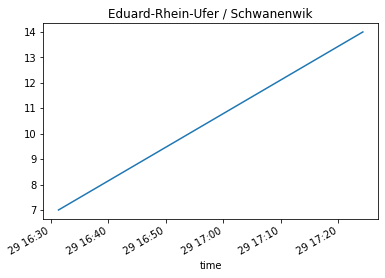

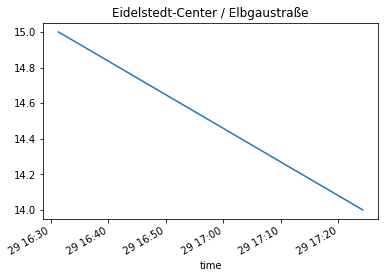

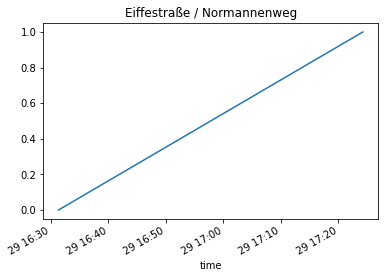

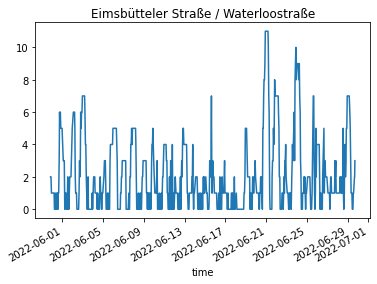

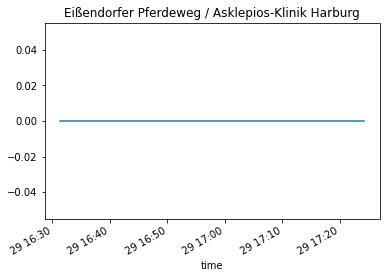

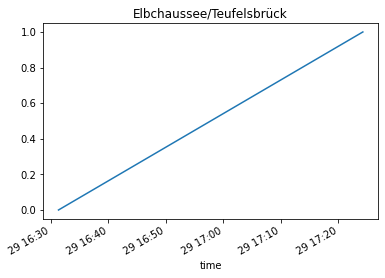

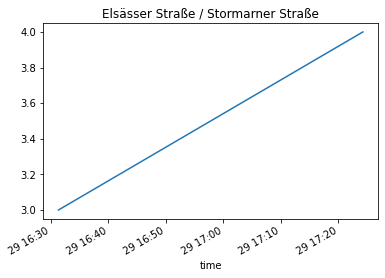

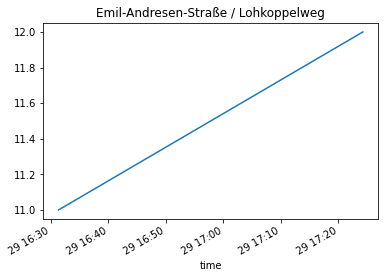

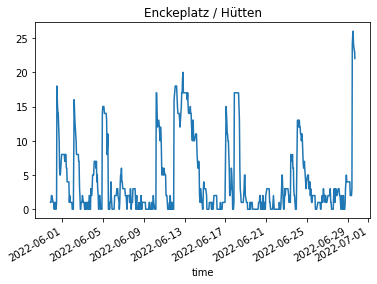

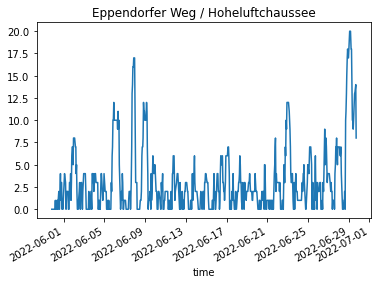

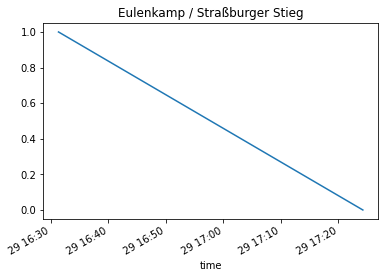

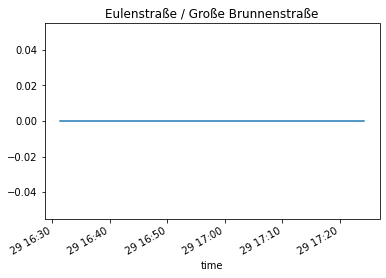

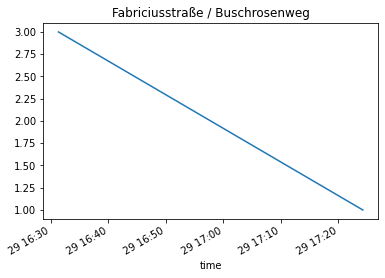

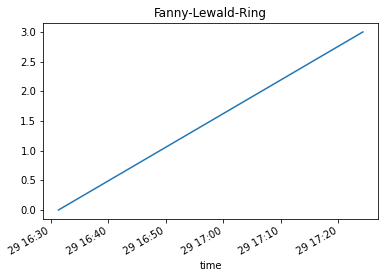

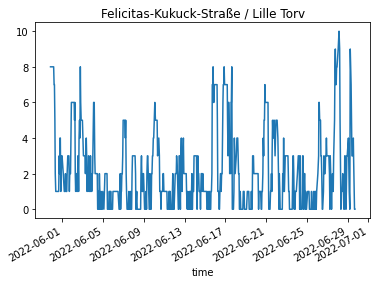

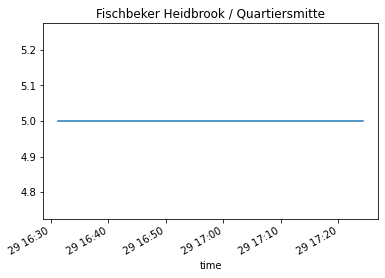

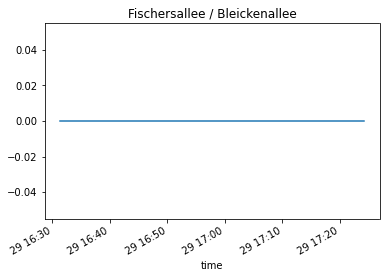

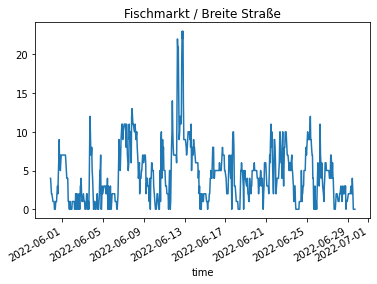

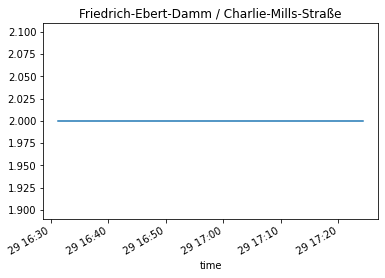

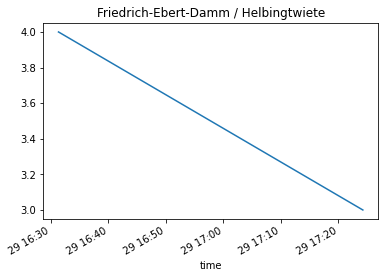

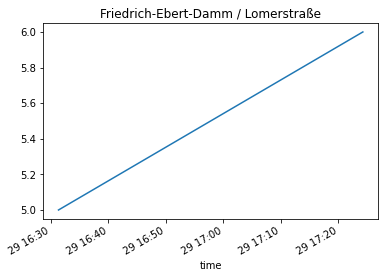

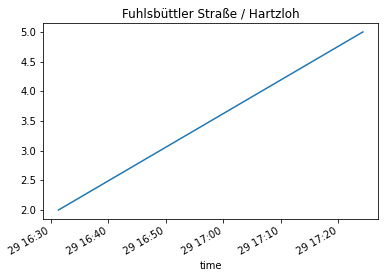

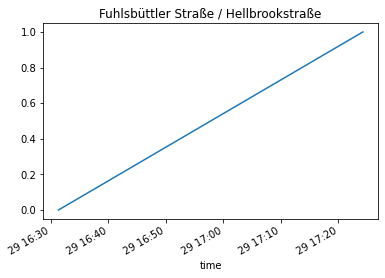

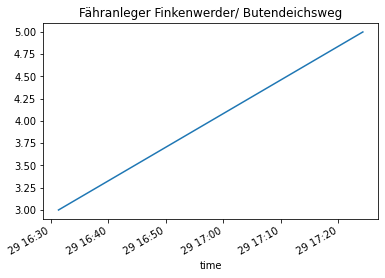

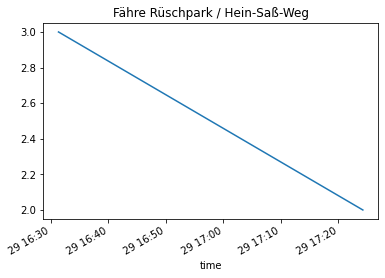

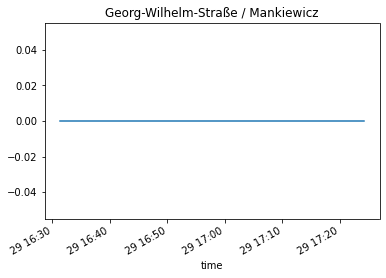

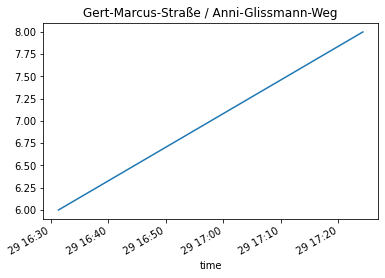

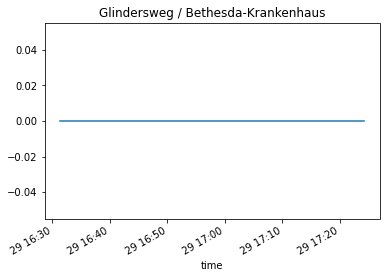

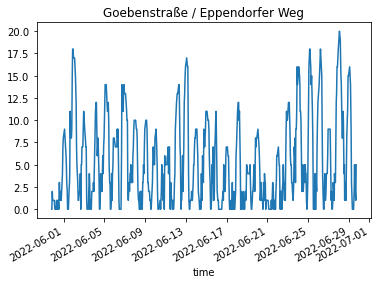

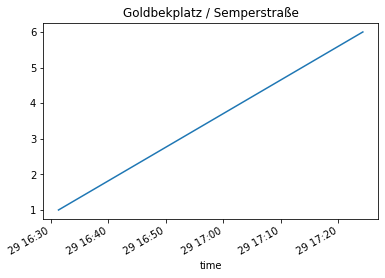

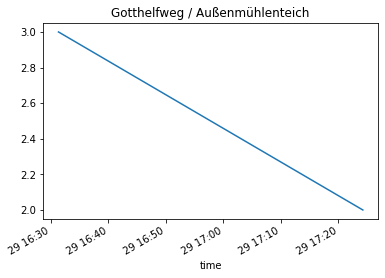

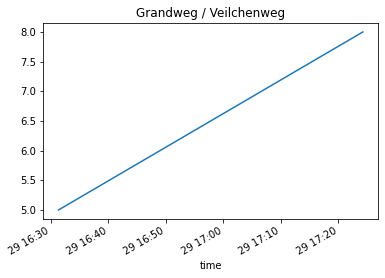

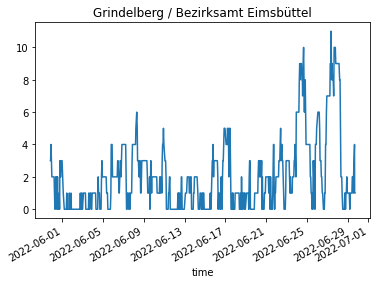

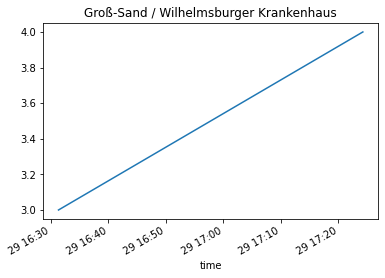

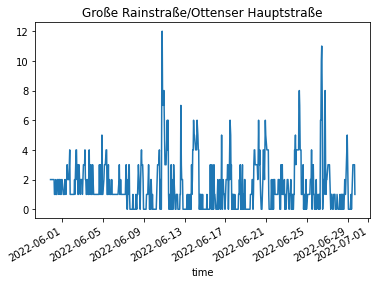

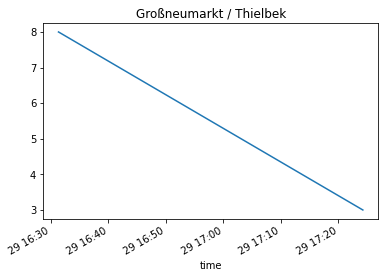

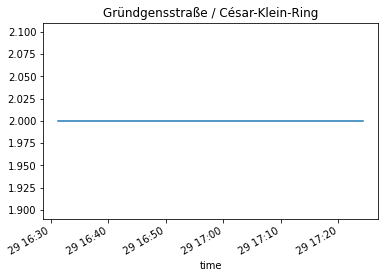

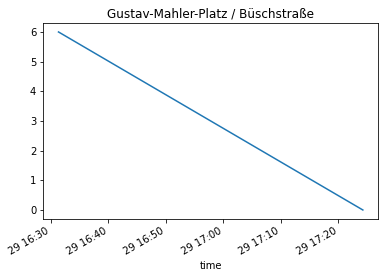

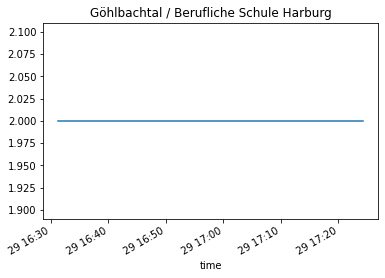

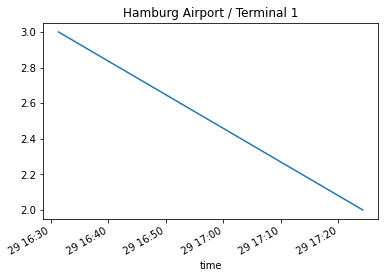

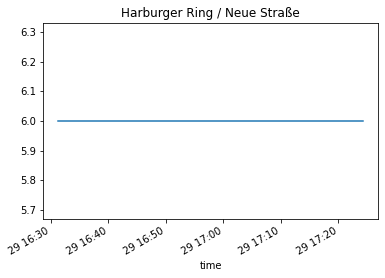

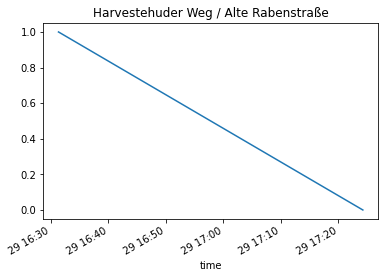

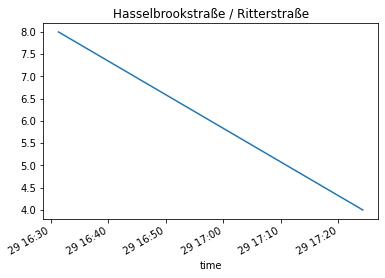

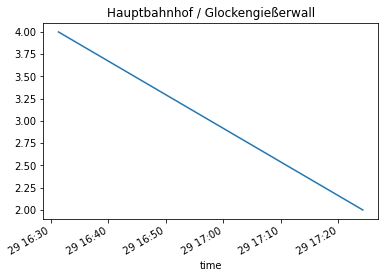

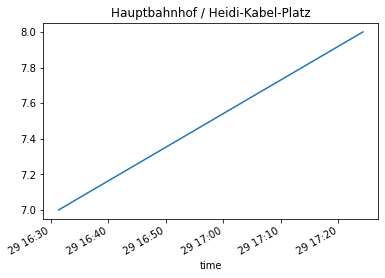

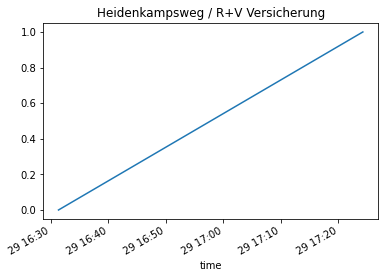

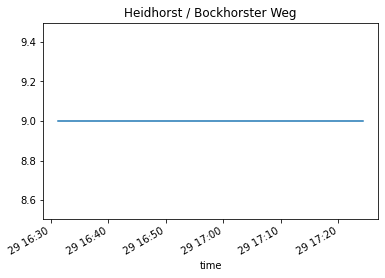

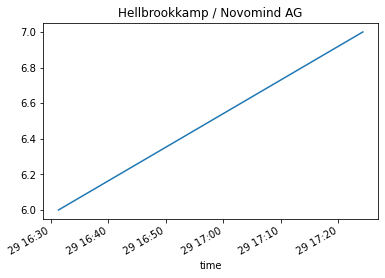

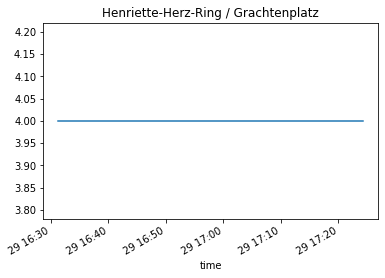

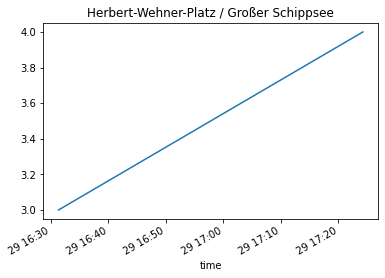

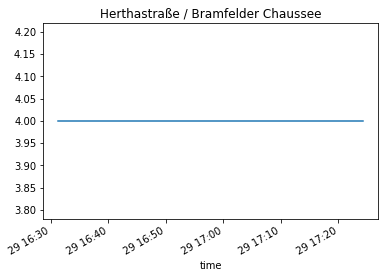

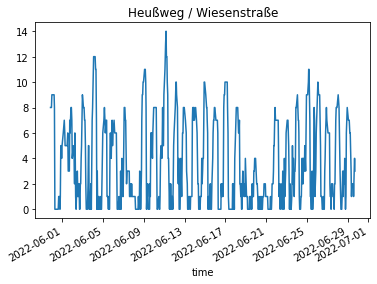

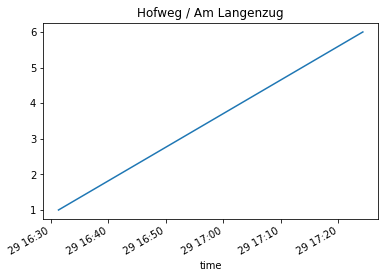

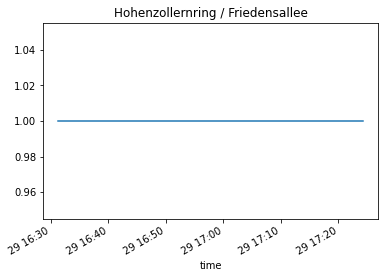

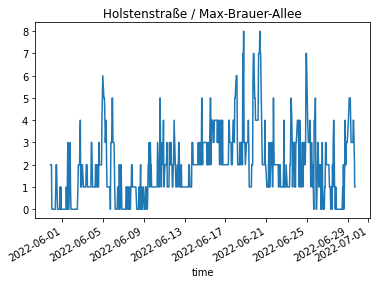

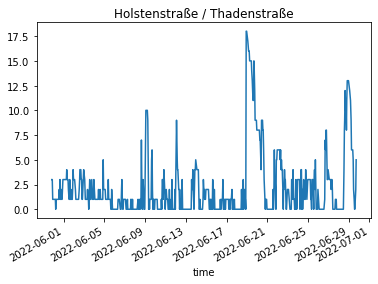

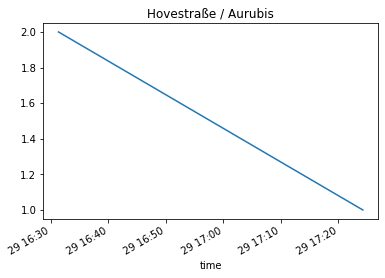

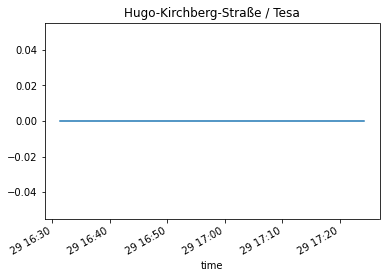

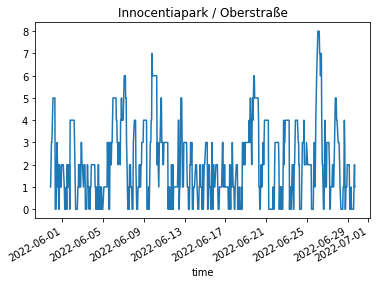

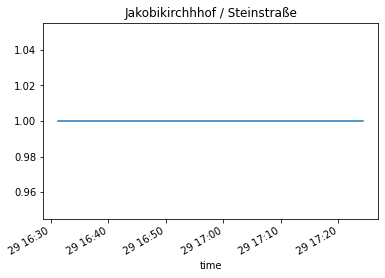

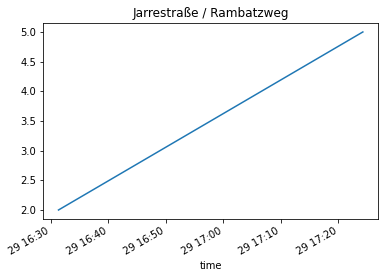

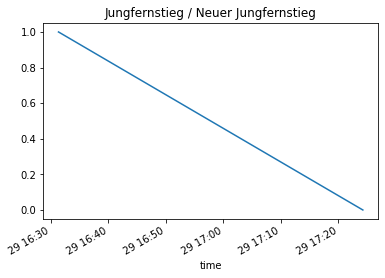

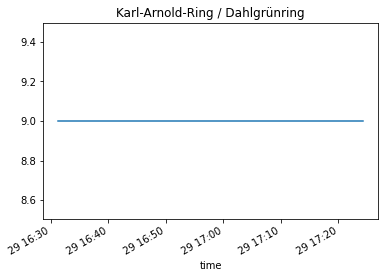

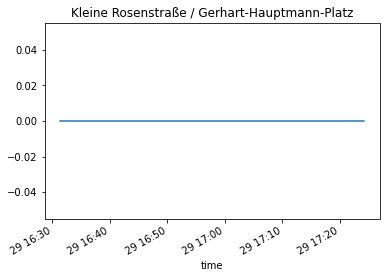

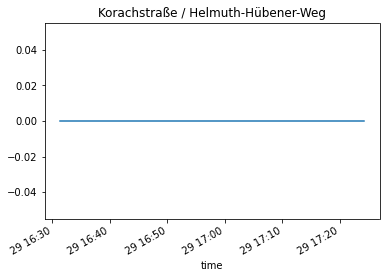

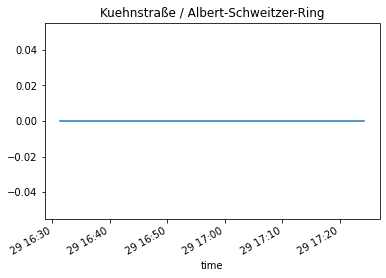

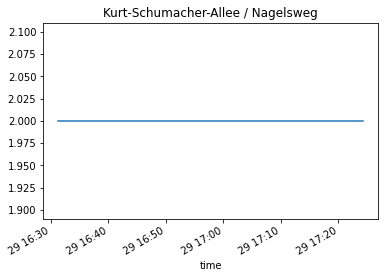

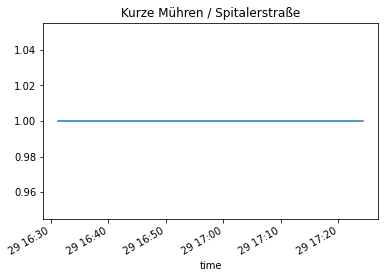

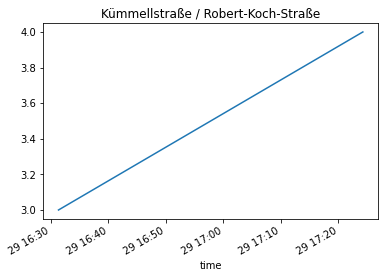

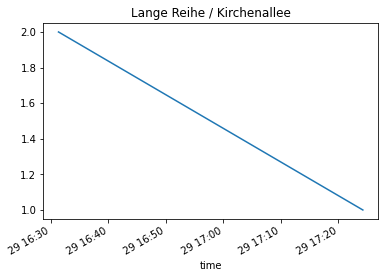

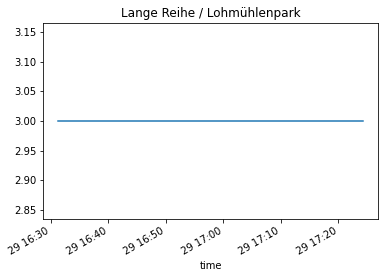

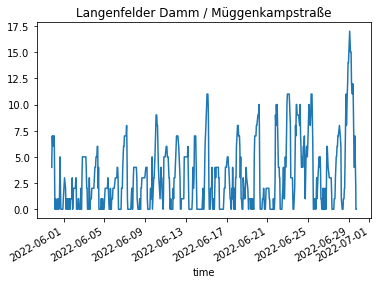

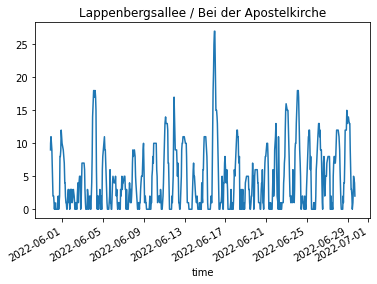

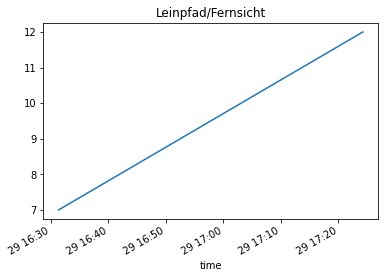

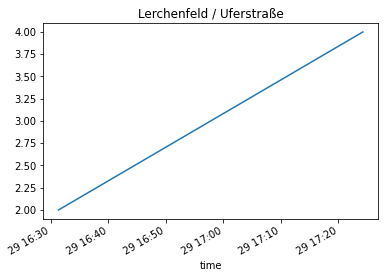

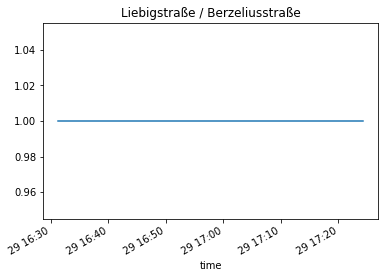

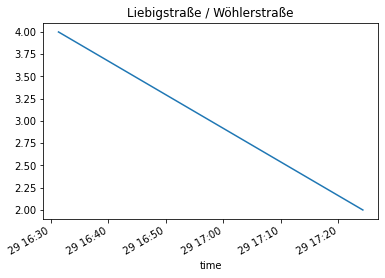

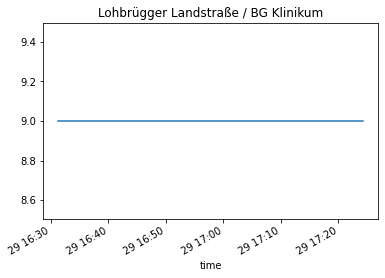

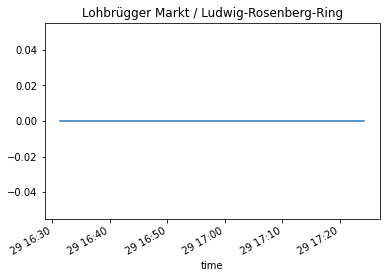

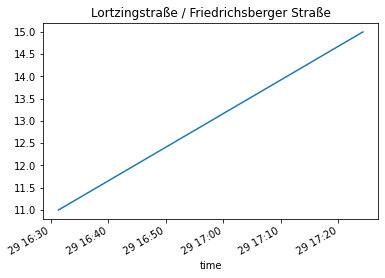

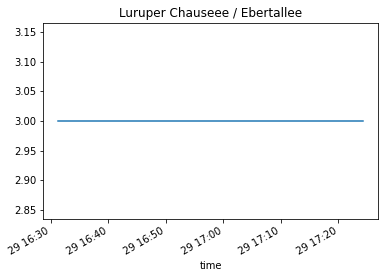

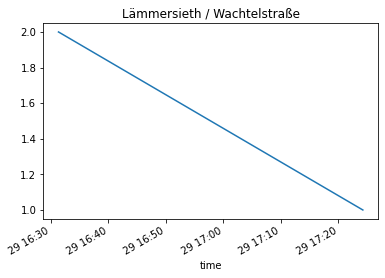

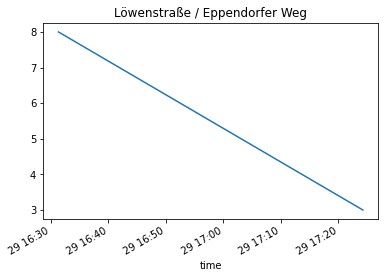

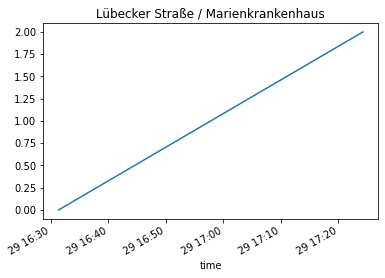

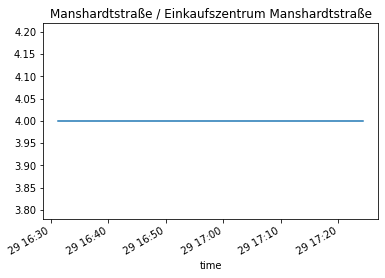

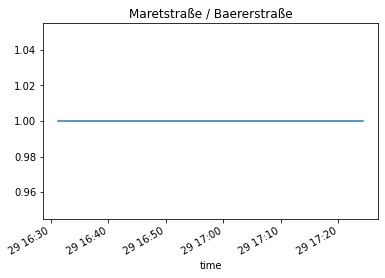

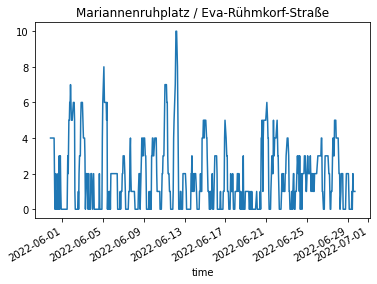

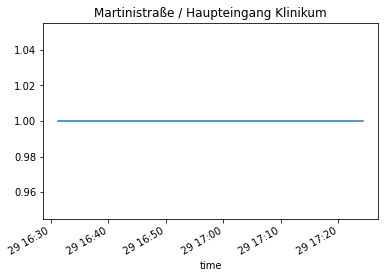

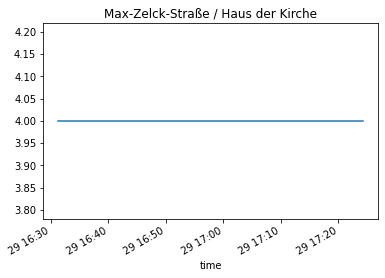

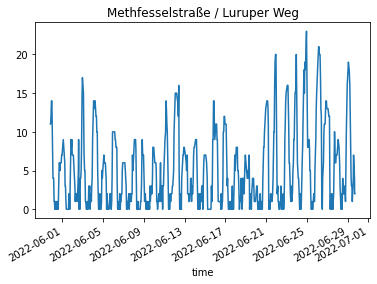

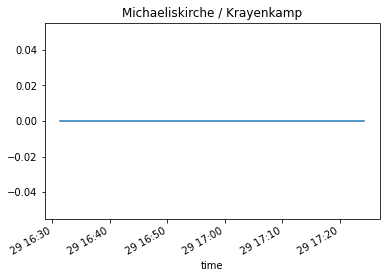

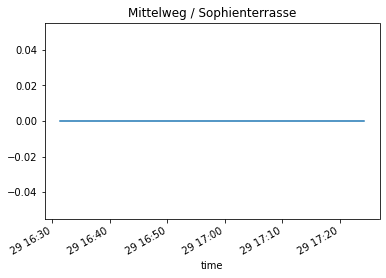

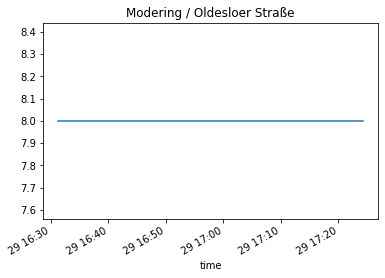

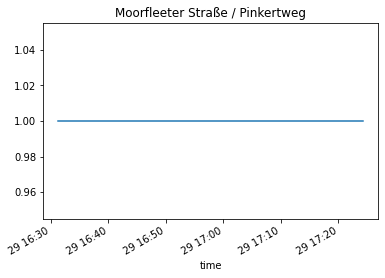

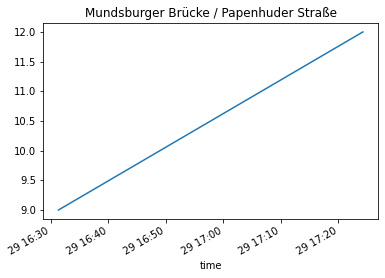

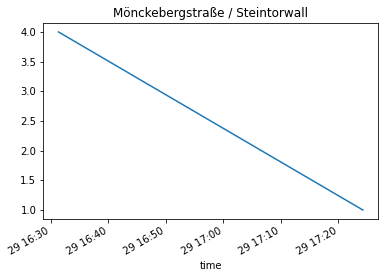

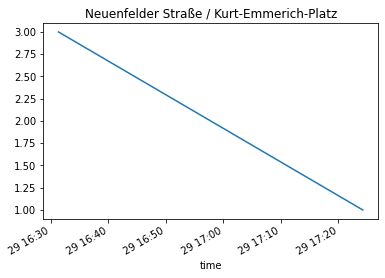

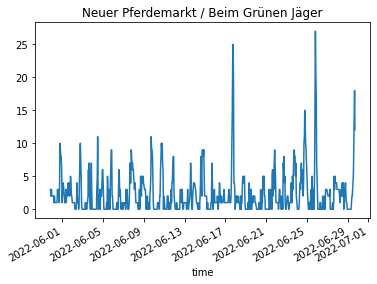

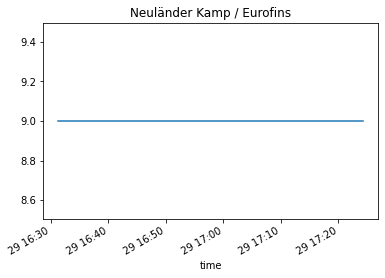

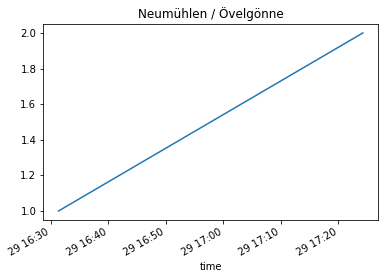

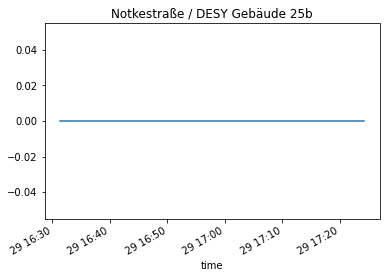

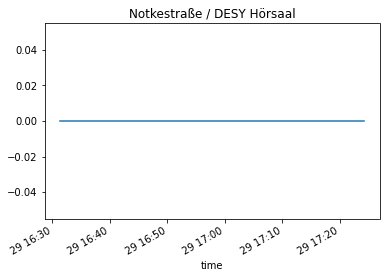

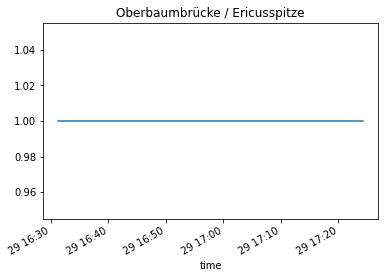

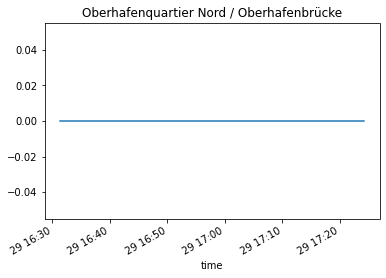

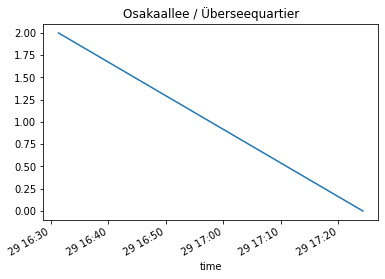

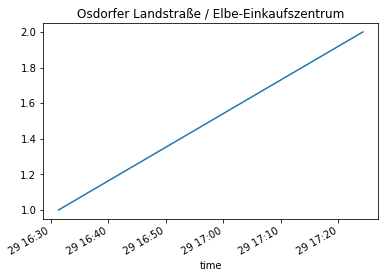

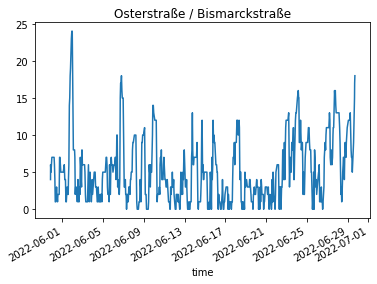

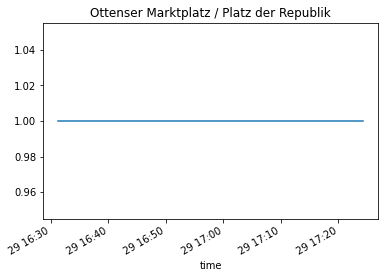

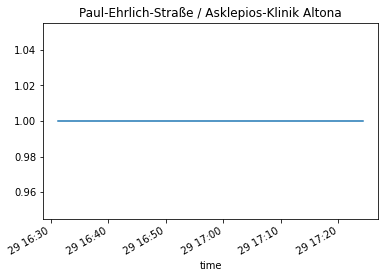

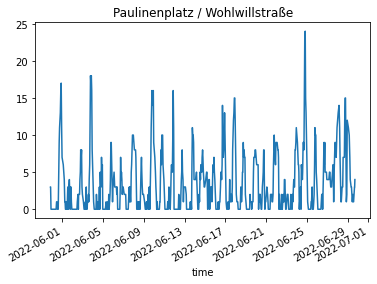

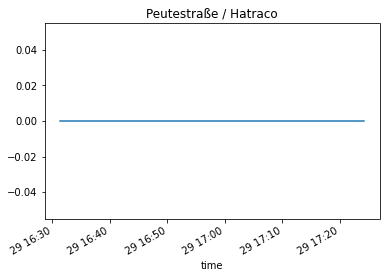

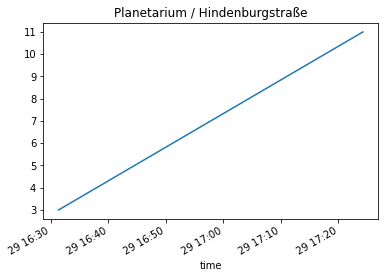

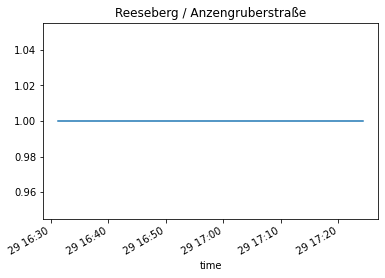

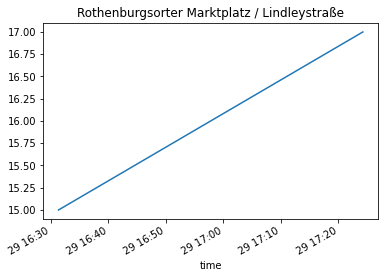

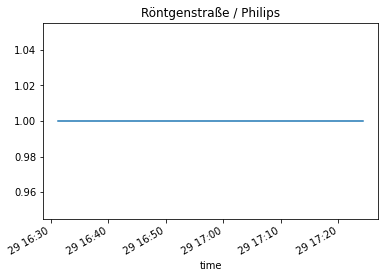

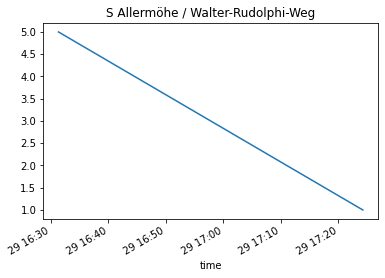

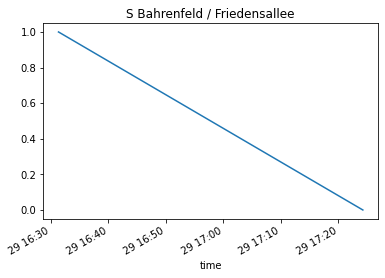

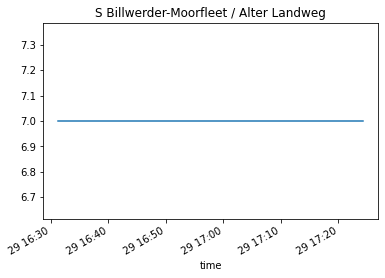

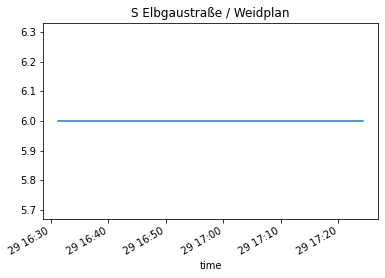

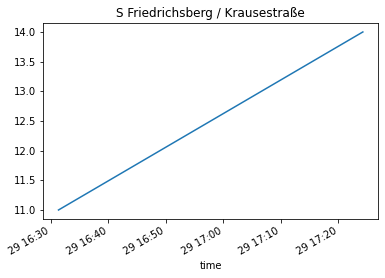

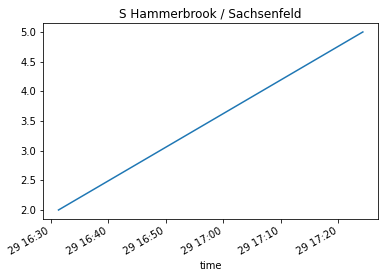

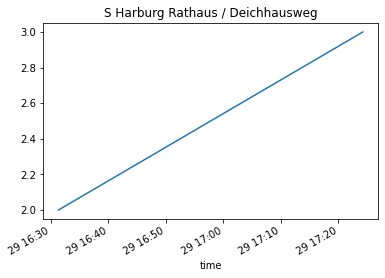

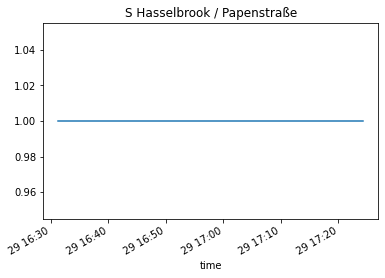

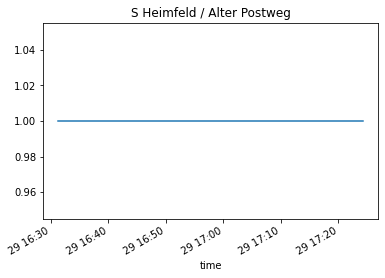

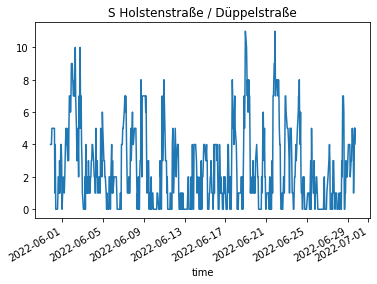

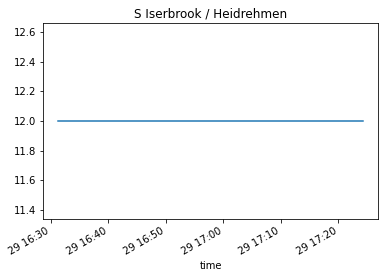

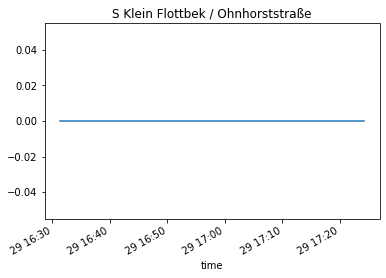

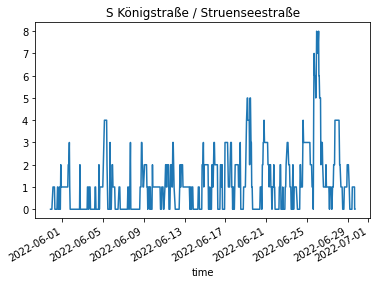

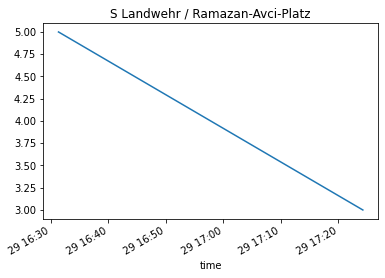

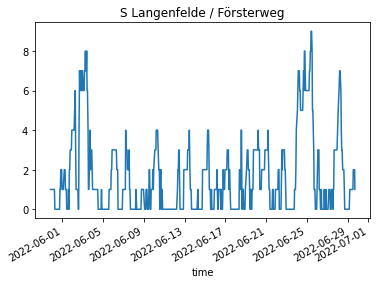

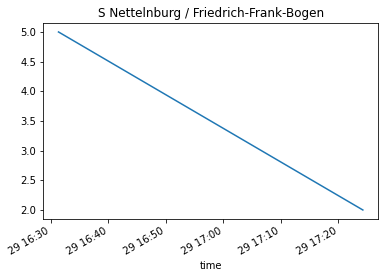

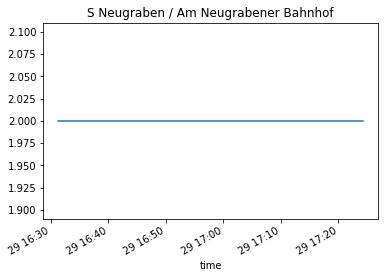

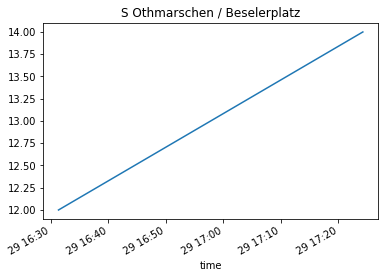

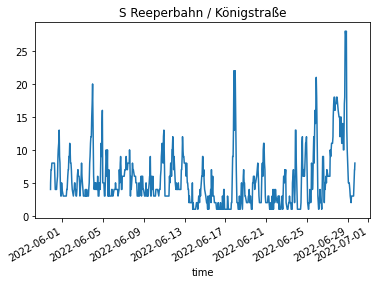

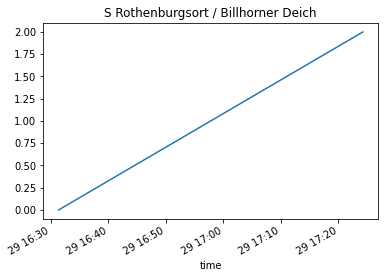

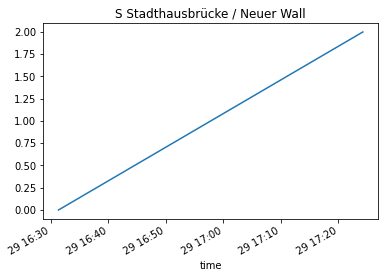

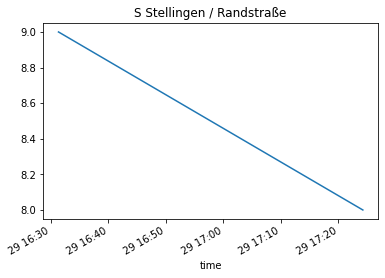

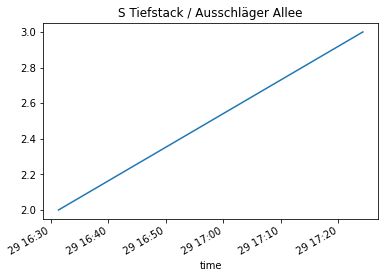

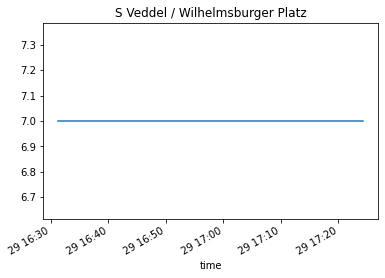

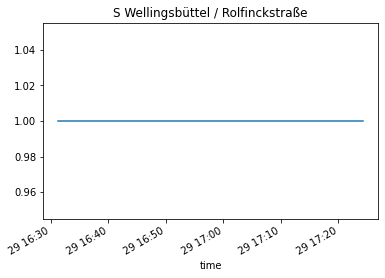

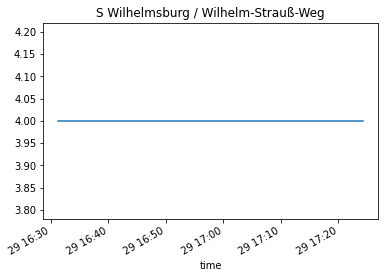

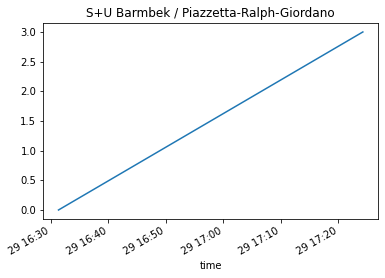

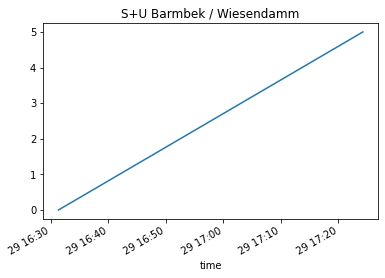

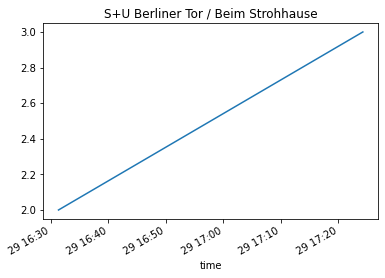

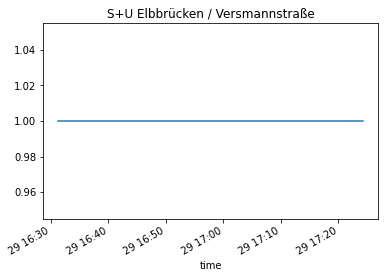

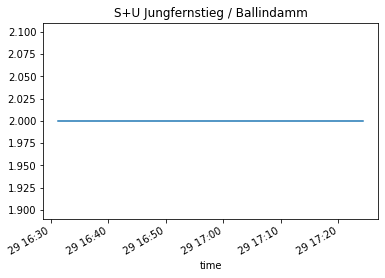

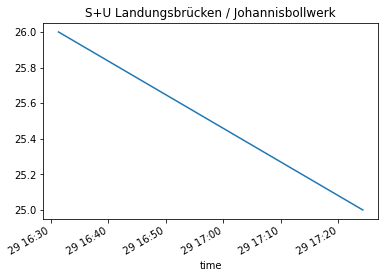

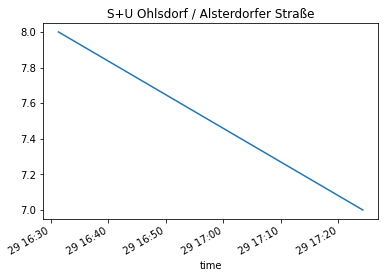

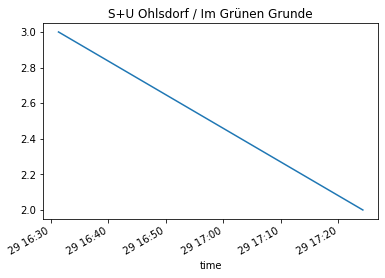

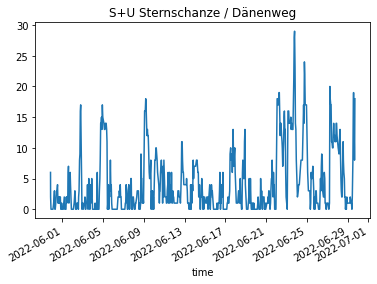

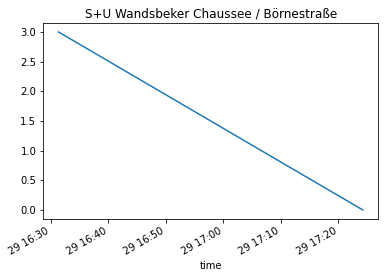

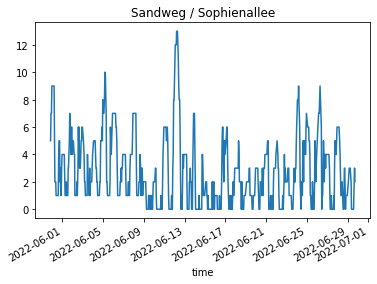

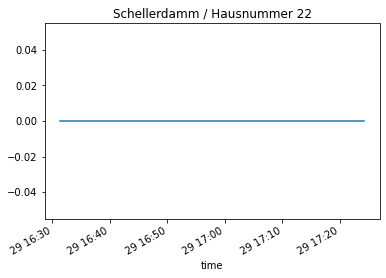

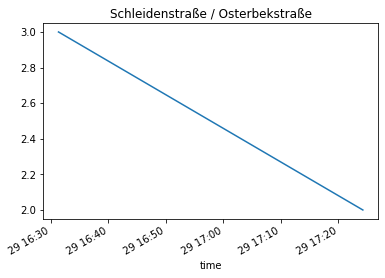

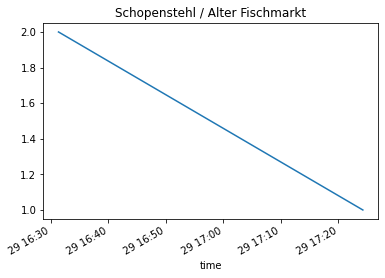

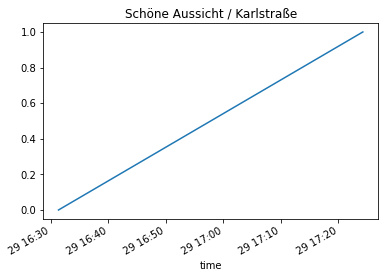

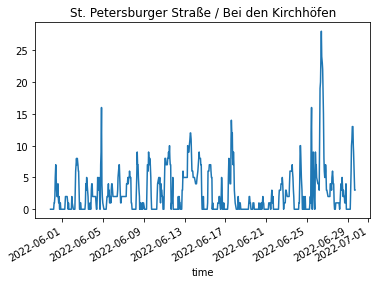

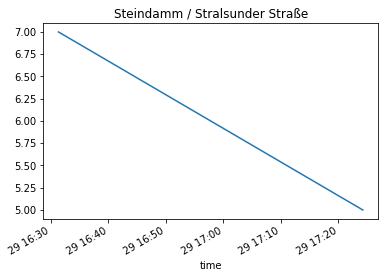

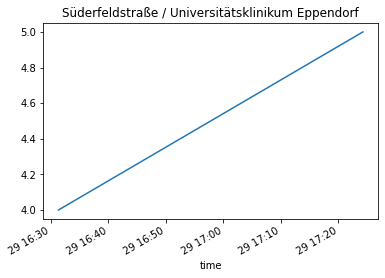

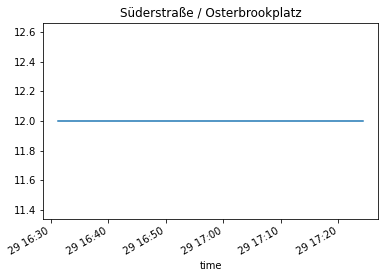

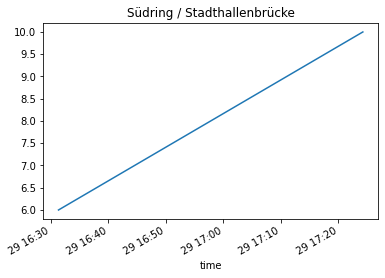

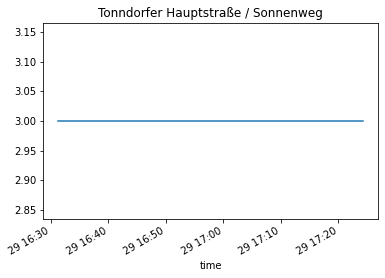

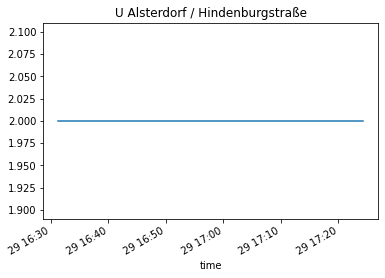

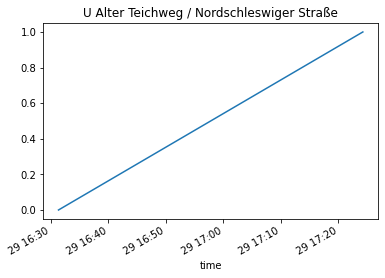

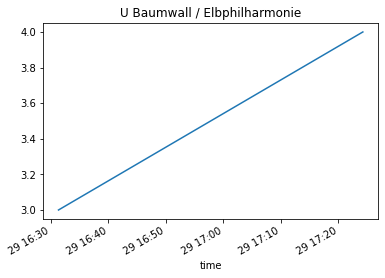

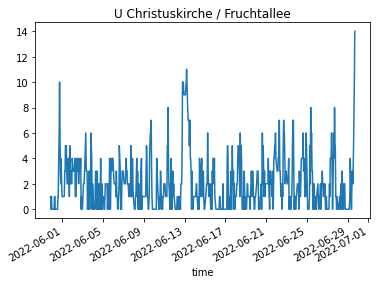

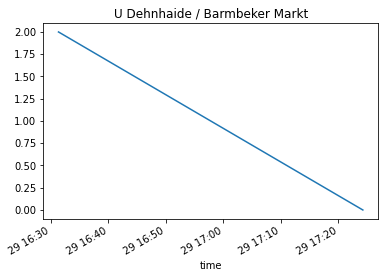

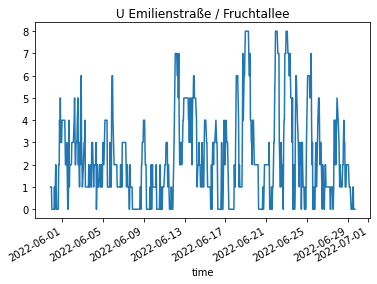

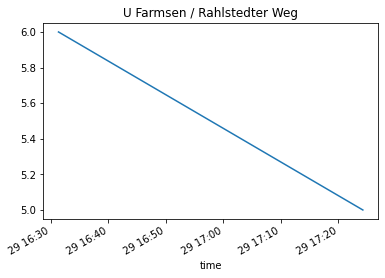

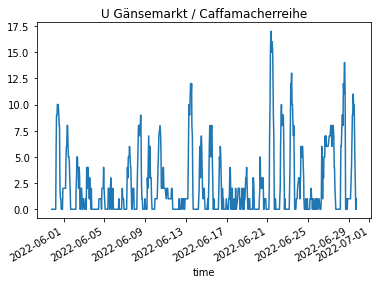

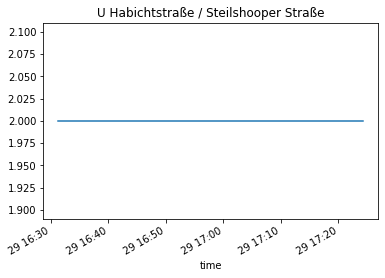

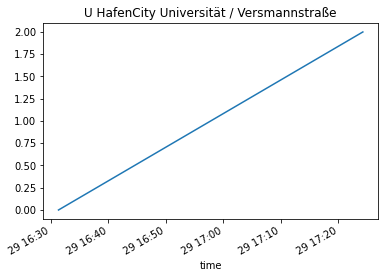

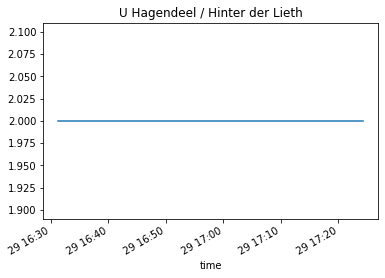

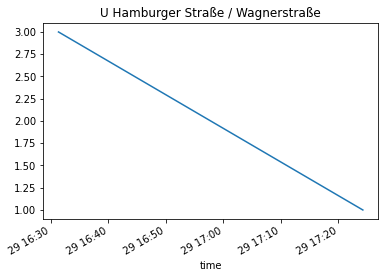

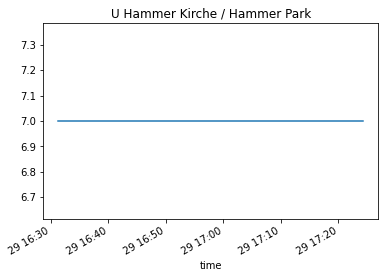

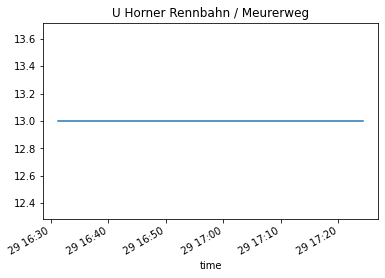

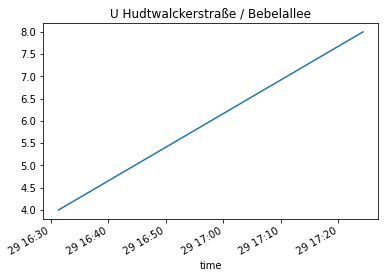

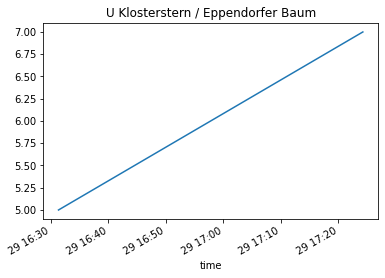

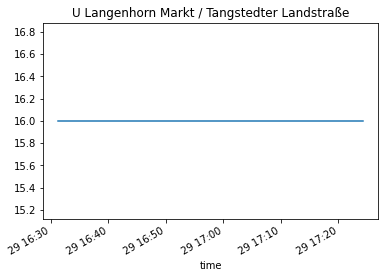

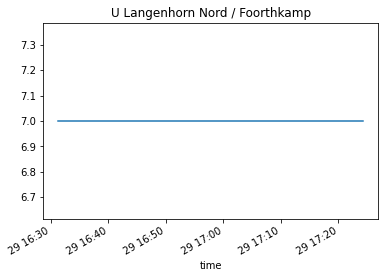

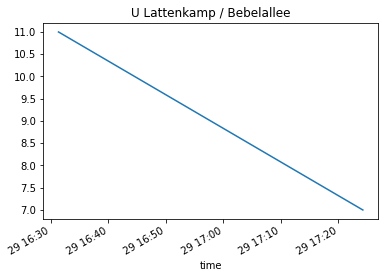

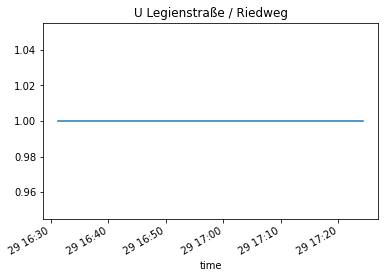

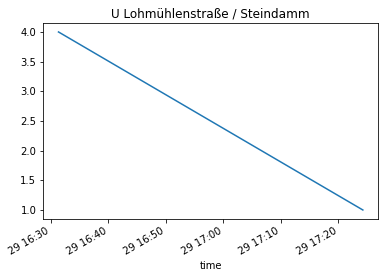

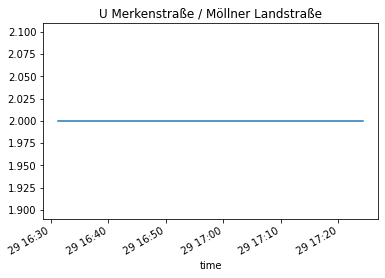

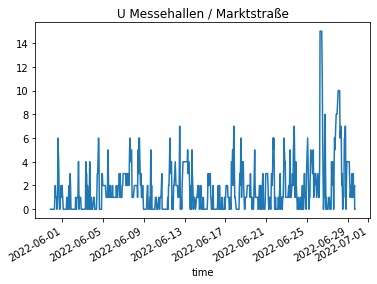

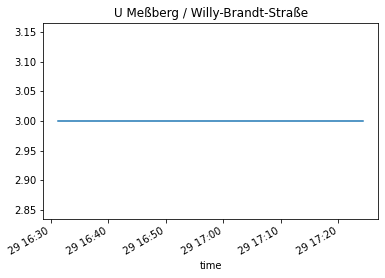

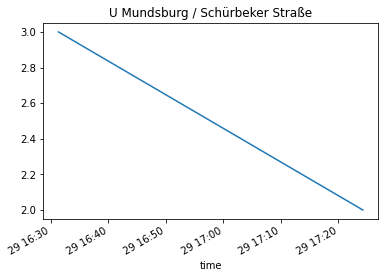

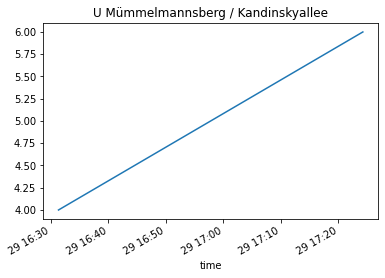

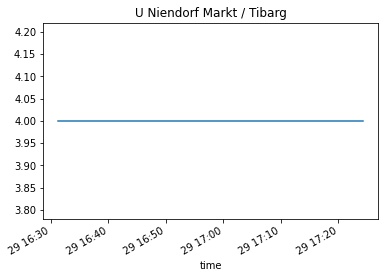

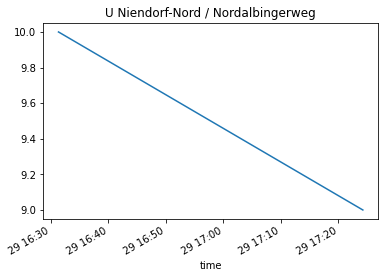

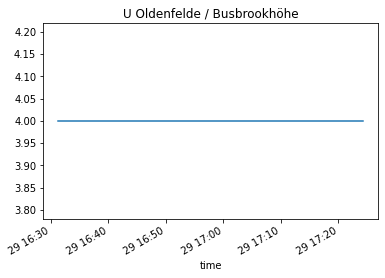

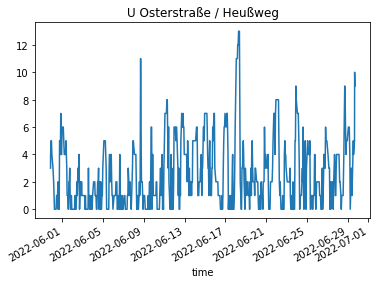

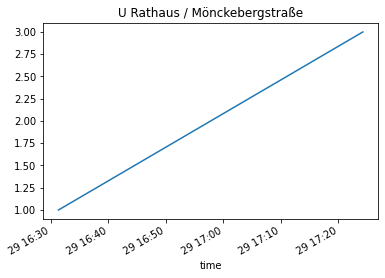

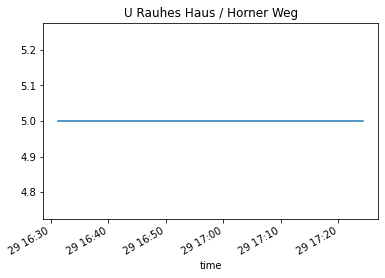

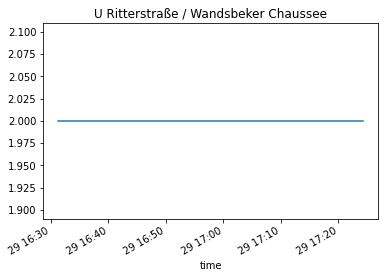

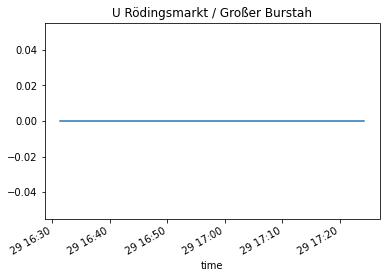

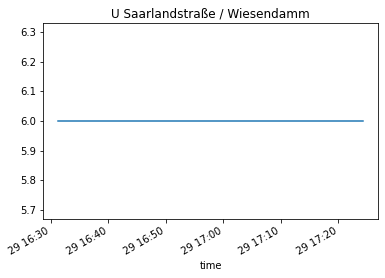

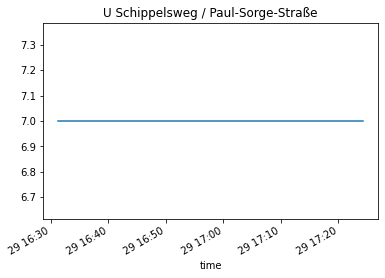

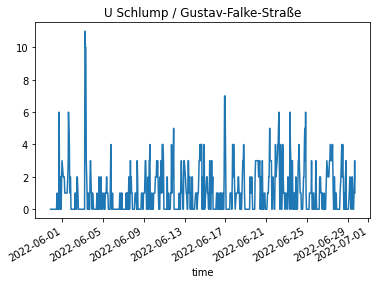

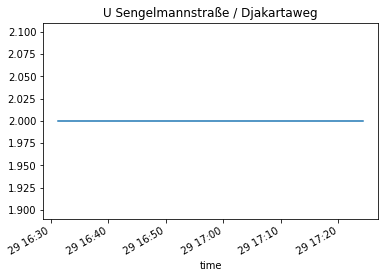

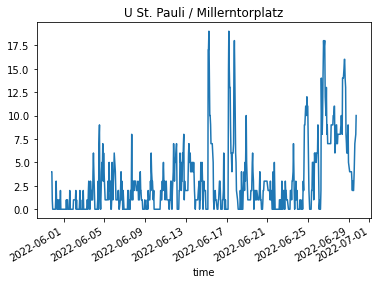

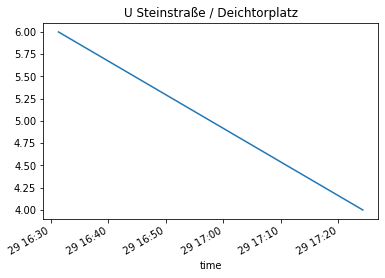

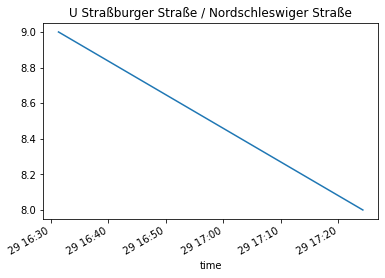

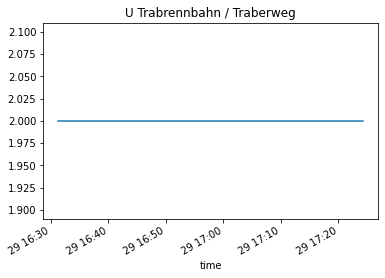

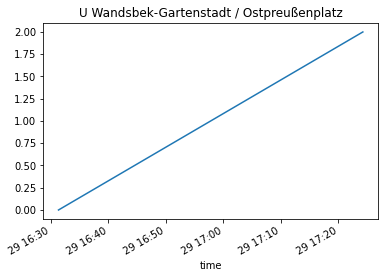

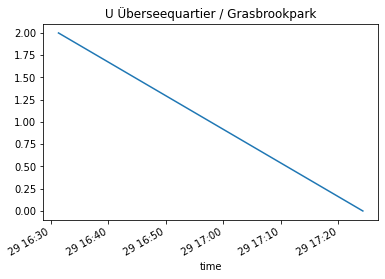

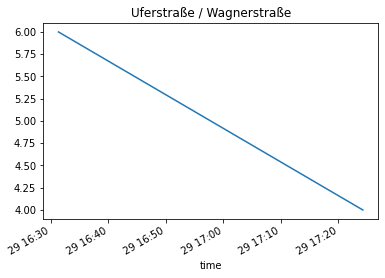

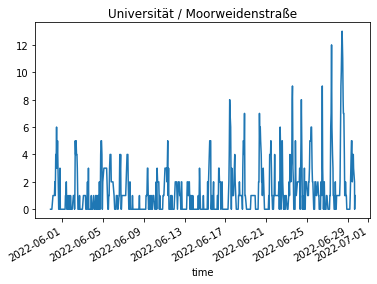

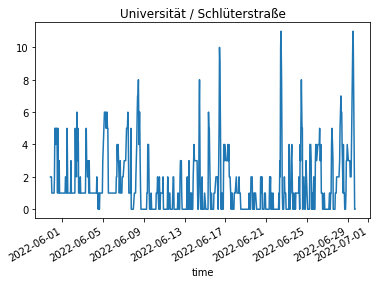

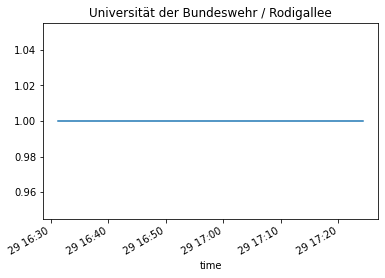

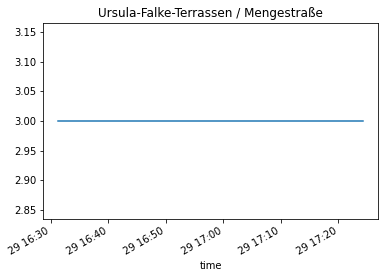

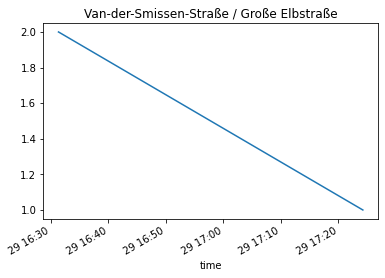

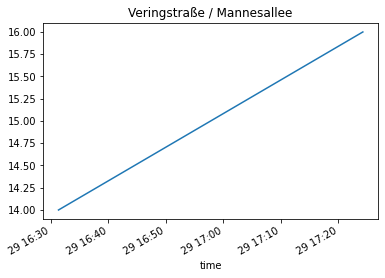

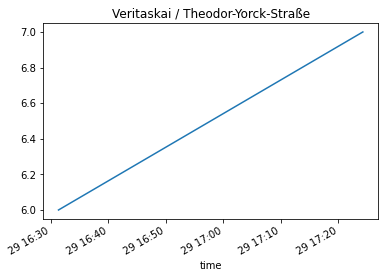

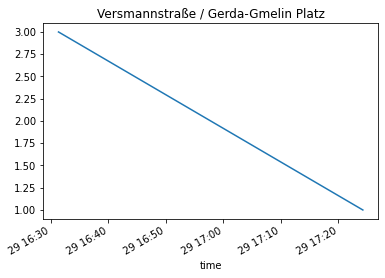

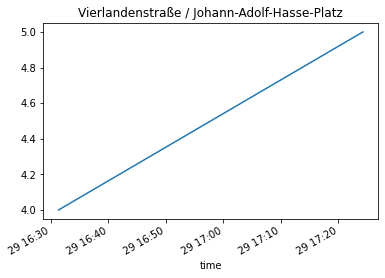

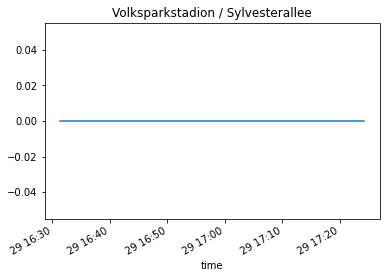

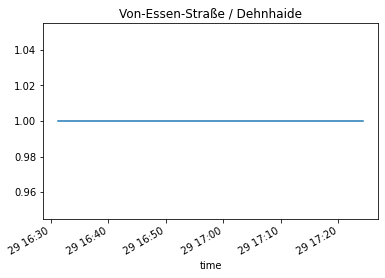

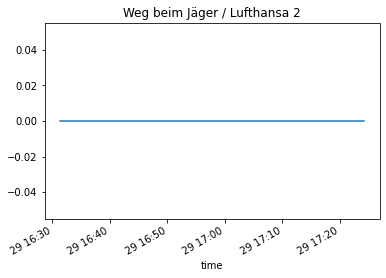

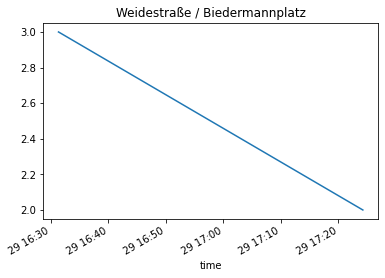

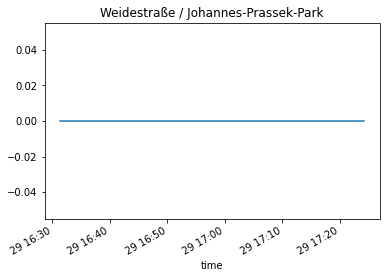

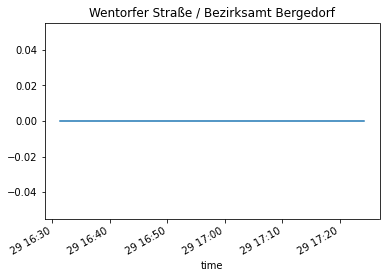

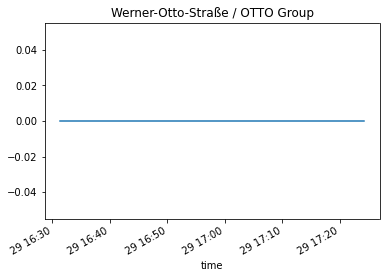

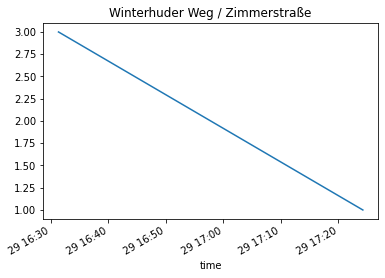

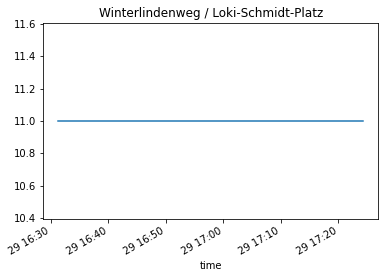

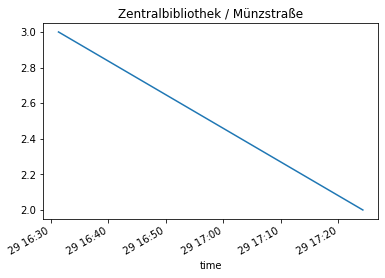

KeyboardInterrupt: 

In [17]:
for name, dfg in df.groupby("name"):
    dfg.set_index("time")["rentalObjectCount.bike"].plot()
    plt.title(name)
    plt.show()

In [12]:
for n,dfg in df2.groupby("name"):
    # print(n)
    if len(df)>2:
        try:
            dfg.reset_index().set_index("date").time.dt.hour.plot()
            plt.title(n)
            plt.show()
        except TypeError:
            print(df)
            # break
    #break

AttributeError: 'DataFrame' object has no attribute 'dt'